# Machine Learning
## Lab \#7: Handwritten Digit Recognition
### Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)
---

Let's begin with importing all the required librairies.

In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 300

import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils import np_utils
from keras.models import model_from_json

from PIL import Image

Using TensorFlow backend.


In [2]:
import keras.backend.tensorflow_backend as tfback
from keras import backend as K

Check the current installed version of `tensorflow` and `keras`.

In [3]:
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


The following method allows to get a list of available **GPU** devices, formatted as strings.

In [4]:
def _get_available_gpus():
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

In [5]:
tfback._get_available_gpus = _get_available_gpus

In [6]:
# K.image_data_format() == 'channels_first'
# K.set_image_dim_ordering('tf')
K.set_image_data_format('channels_last') # tf: TensorFlow, th: Theano

Fix random seed for reproducibility.

In [7]:
np.random.seed(0)

Load and normalize the data.

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
'''
img_idx = np.random.randint(0, high=X_test.shape[0])
plt.imshow(X_train[img_idx, :, :], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()
print("The output is {}.".format(y_train[img_idx]))
'''

'\nimg_idx = np.random.randint(0, high=X_test.shape[0])\nplt.imshow(X_train[img_idx, :, :], cmap=plt.cm.gray_r, interpolation="nearest")\nplt.show()\nprint("The output is {}.".format(y_train[img_idx]))\n'

In [10]:
num_samples_train = np.random.randint(0, high=X_train.shape[0], size=20000)
X_train = X_train[num_samples_train, :, :]
y_train =y_train[num_samples_train]

In [11]:
num_samples_test = np.random.randint(0, high=X_test.shape[0], size=4000)
X_test = X_test[num_samples_test, :, :]
y_test =y_test[num_samples_test]

Reshape the inputs.

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Normalize the inputs from 0 $\to$ 255 to 0 $\to$ 1.

In [13]:
X_train = X_train/255
X_test = X_test/255

One hot encode the outputs.

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Number of classes is 10.

In [15]:
num_classes = y_test.shape[1]

It is time now to define and build the model.

In [16]:
my_model = Sequential()
my_model.add(Conv2D(16, (5,5), input_shape=(28,28,1), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Conv2D(32, (3,3), activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Dropout(0.2))
my_model.add(Flatten())
# Fully Connected NN
my_model.add(Dense(128, activation='relu'))
my_model.add(Dense(50, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))

In [17]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

- [List of losses](https://keras.io/losses/)
- [List of optimizers](https://keras.io/optimizers/)
- [List of metrics](https://keras.io/metrics/)

In [18]:
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the model.

In [19]:
r = my_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100)

print("Returned:", r)

Train on 20000 samples, validate on 4000 samples
Epoch 1/5
20000/20000 [==============================] - 5s 264us/step - loss: 0.5183 - accuracy: 0.8475 - val_loss: 0.1267 - val_accuracy: 0.9680
Epoch 2/5
20000/20000 [==============================] - 4s 200us/step - loss: 0.1278 - accuracy: 0.9627 - val_loss: 0.0794 - val_accuracy: 0.9745
Epoch 3/5
20000/20000 [==============================] - 5s 232us/step - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.0746 - val_accuracy: 0.9722
Epoch 4/5
20000/20000 [==============================] - 5s 242us/step - loss: 0.0660 - accuracy: 0.9789 - val_loss: 0.0632 - val_accuracy: 0.9808
Epoch 5/5
20000/20000 [==============================] - 5s 259us/step - loss: 0.0541 - accuracy: 0.9822 - val_loss: 0.0569 - val_accuracy: 0.9810
Returned: <keras.callbacks.callbacks.History object at 0x7f539c4b1640>


By printing the available keys, we should see: `dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])`.

In [20]:
print(r.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


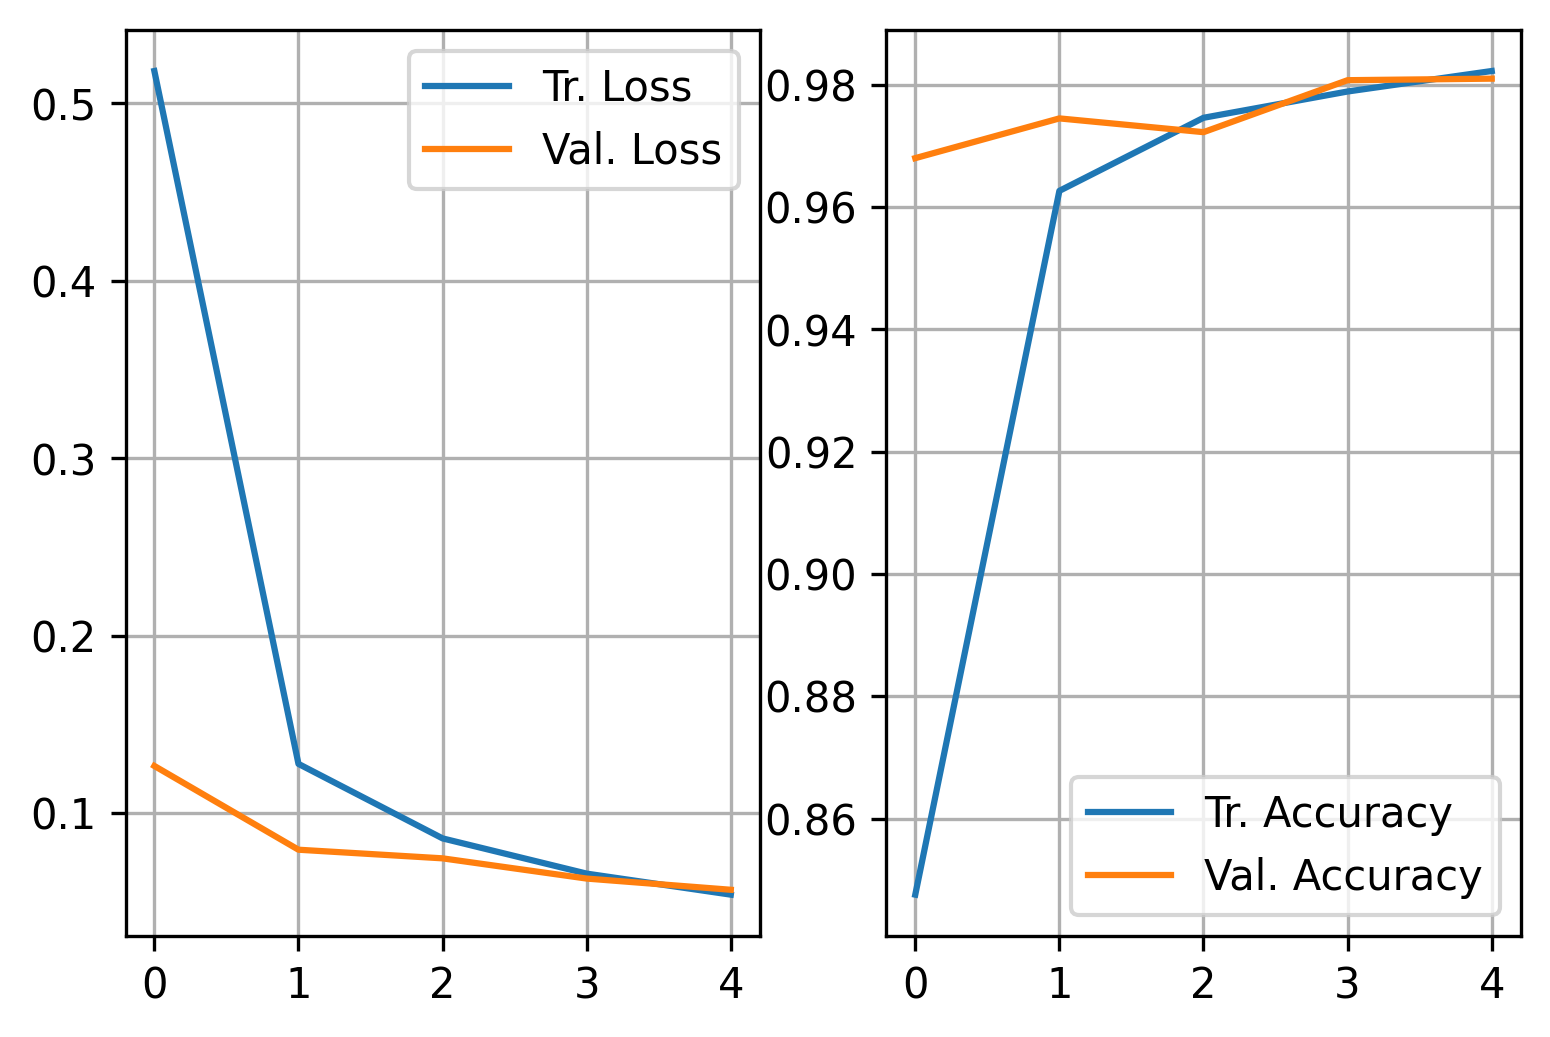

In [21]:
# Losses
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='Tr. Loss')
plt.plot(r.history['val_loss'], label='Val. Loss')
plt.grid()
plt.legend()

# Accuracies
plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='Tr. Accuracy')
plt.plot(r.history['val_accuracy'], label='Val. Accuracy')
plt.grid()
plt.legend()

Evaluate the model.

In [22]:
scores = my_model.evaluate(X_test, y_test, verbose=0)
print("CNN error: {}%".format(100*(1-scores[1])))

CNN error: 1.8999993801116943%


Test the model.

(-0.5, 27.5, 27.5, -0.5)

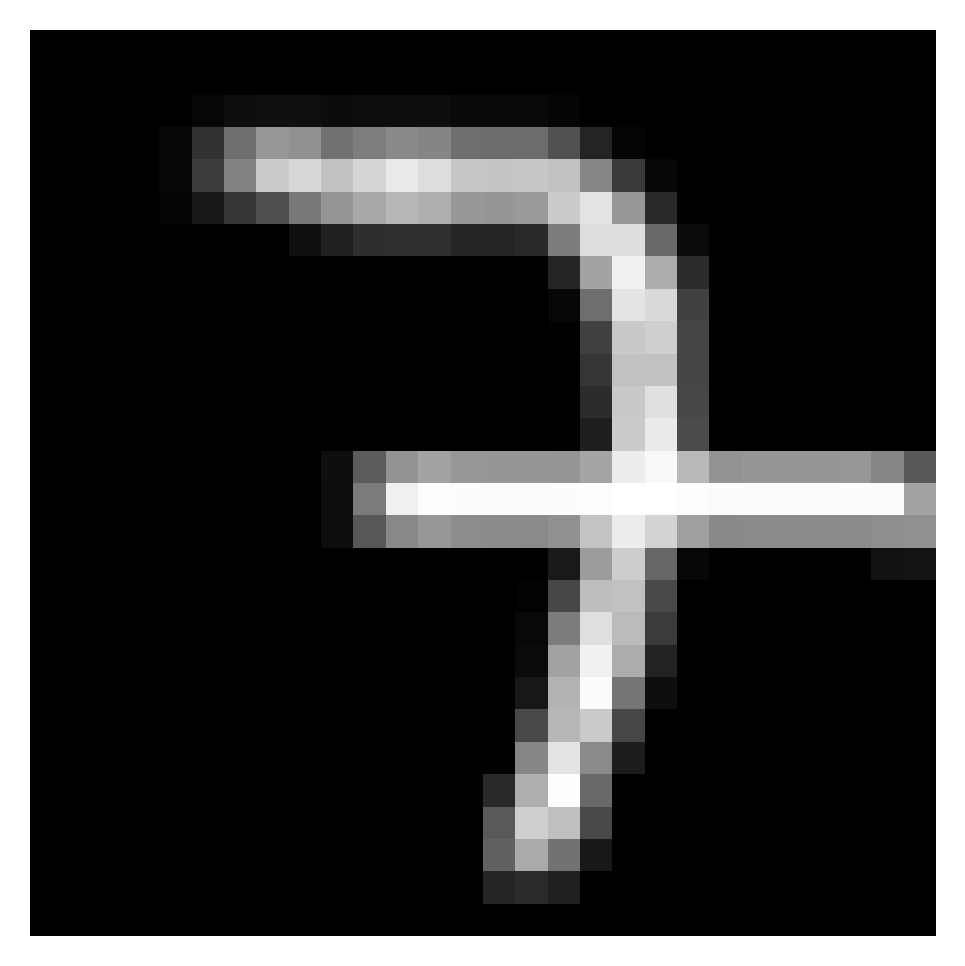

In [23]:
img = Image.open('to-test/7.png');
img = img.convert('L')
img = img.resize((28, 28))

array_img = (np.array(img))/255
in_data = array_img.reshape((1, 28, 28, 1)).astype('float32')

plt.imshow(array_img*255, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('Off')

In [24]:
y_pred = my_model.predict(in_data)
_, idx = np.where(y_pred == np.max(y_pred))
print("Result is {}. Probability is {}%.".format(int(idx), 100*y_pred[0, int(idx)]))

Result is 8. Probability is 55.90149760246277%.
